In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic.csv')

In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S


In [4]:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.")

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


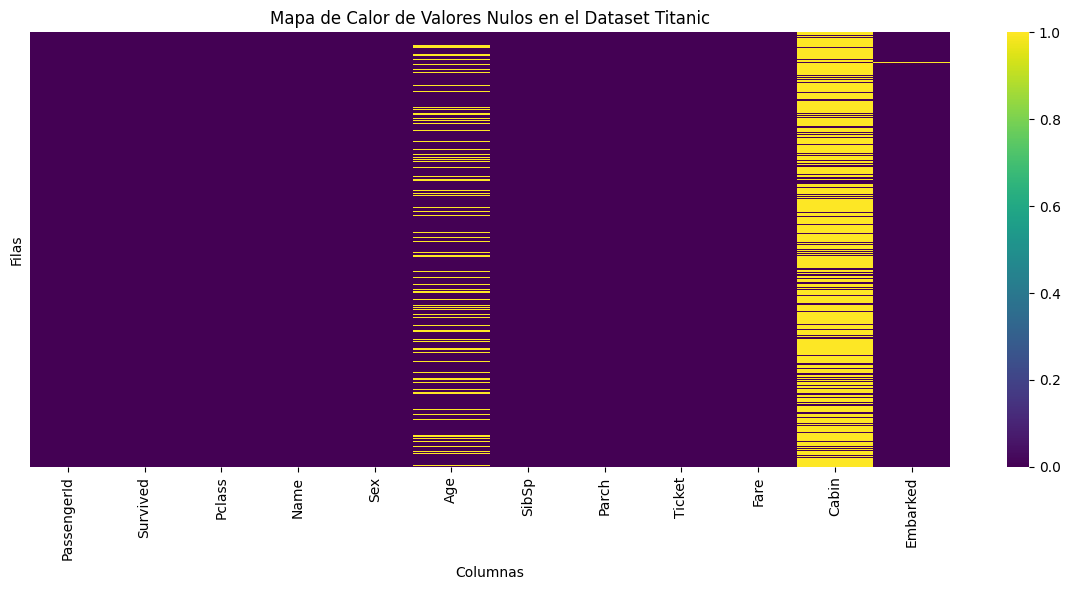

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(12, 6))

# Crear mapa de calor de valores nulos
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)

plt.title('Mapa de Calor de Valores Nulos en el Dataset Titanic')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()

In [7]:
# Visualizar porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df) * 100).round(2).sort_values(ascending=False))


Porcentaje de valores nulos por columna:
Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


/var/folders/v6/c5c6s_753wb_jzx0dl9rpymc0000gn/T/ipykernel_35009/3599593486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.values, y=valores_nulos.index, palette='viridis')


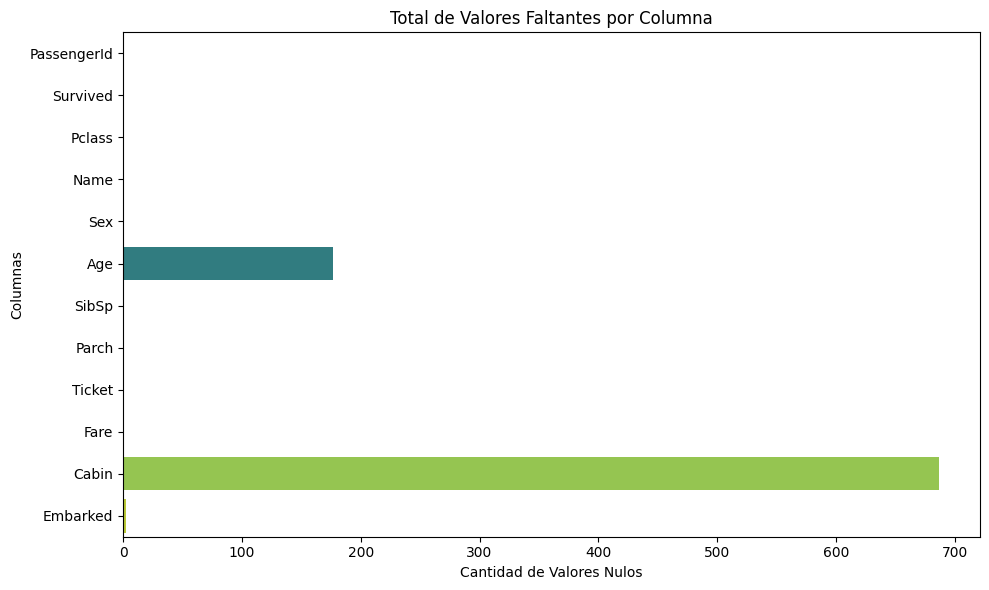

In [8]:
# Calcular valores nulos por columna
valores_nulos = df.isnull().sum()

# Crear figura
plt.figure(figsize=(10, 6))

# Crear gráfica de barras
sns.barplot(x=valores_nulos.values, y=valores_nulos.index, palette='viridis')

plt.title('Total de Valores Faltantes por Columna')
plt.xlabel('Cantidad de Valores Nulos')
plt.ylabel('Columnas')
plt.tight_layout()
plt.show()

In [9]:
df.drop('Cabin', axis = 1, inplace = True)

In [10]:
# Calcular la media de la columna Age
mean_age = df['Age'].mean()

# Imputar sin inplace
df['Age'] = df['Age'].fillna(mean_age)

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [16]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [17]:
df.to_csv('./data/titanic_clean.csv', index=False)